<a href="https://colab.research.google.com/github/jayanthd001/TSF_Task---7/blob/main/TSF_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jayanth D**

Task - Create a hybrid model for stock price/performance prediction
using numerical analysis of historical stock prices, and sentimental analysis of
news headlines 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
#web data reader is extension of pandas library to communicate with frequently updating data

In [ ]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2019, 12, 31)

df = web.DataReader("MSFT", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,156.137955
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,157.417786
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,157.705505
2019-12-30,159.020004,156.729996,158.990005,157.589996,16348400.0,156.346298
2019-12-31,157.770004,156.449997,156.770004,157.699997,18369400.0,156.455429


We have the data of Microsoft stocks of 19 years from January 2000 till December 2019.






We analyse stocks using two measurements- Rolling mean and Return rate.


Rolling Mean - Rolling is a very useful operation for time series data. Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data.
In pandas

Moving Average- technical analysis tool that smooths out price data by creating a constantly updated average price.

In [ ]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.head(50)

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
2000-01-10   NaN
2000-01-11   NaN
2000-01-12   NaN
2000-01-13   NaN
2000-01-14   NaN
2000-01-18   NaN
2000-01-19   NaN
2000-01-20   NaN
2000-01-21   NaN
2000-01-24   NaN
2000-01-25   NaN
2000-01-26   NaN
2000-01-27   NaN
2000-01-28   NaN
2000-01-31   NaN
2000-02-01   NaN
2000-02-02   NaN
2000-02-03   NaN
2000-02-04   NaN
2000-02-07   NaN
2000-02-08   NaN
2000-02-09   NaN
2000-02-10   NaN
2000-02-11   NaN
2000-02-14   NaN
2000-02-15   NaN
2000-02-16   NaN
2000-02-17   NaN
2000-02-18   NaN
2000-02-22   NaN
2000-02-23   NaN
2000-02-24   NaN
2000-02-25   NaN
2000-02-28   NaN
2000-02-29   NaN
2000-03-01   NaN
2000-03-02   NaN
2000-03-03   NaN
2000-03-06   NaN
2000-03-07   NaN
2000-03-08   NaN
2000-03-09   NaN
2000-03-10   NaN
2000-03-13   NaN
2000-03-14   NaN
Name: Adj Close, dtype: float64

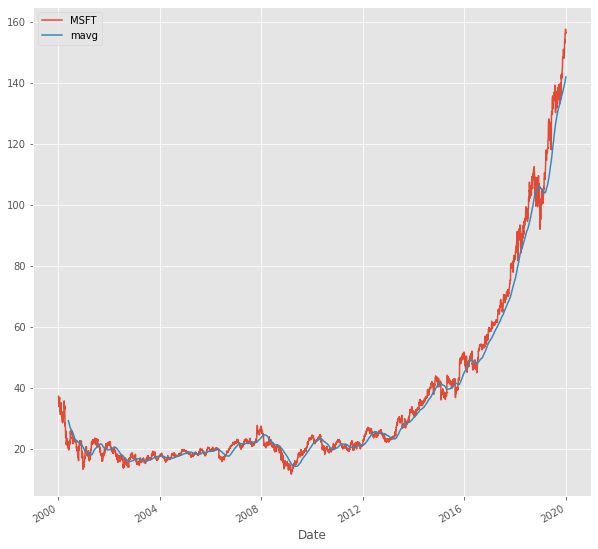

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#adjust the size of matplotlib
import matplotlib as npl
npl.rc('figure', figsize=(10,10))
npl.__version__

#adjust the style of matplotlib
style.use('ggplot')

close_px.plot(label = "MSFT")
mavg.plot(label = 'mavg')
plt.legend()
plt.show()

**Return deviation - determine risk and return**

Expected return measures the expected value/mean of investment returns.
Expected return is calculated by multiplying the weights of each asset by expected and adding value value for each investment.

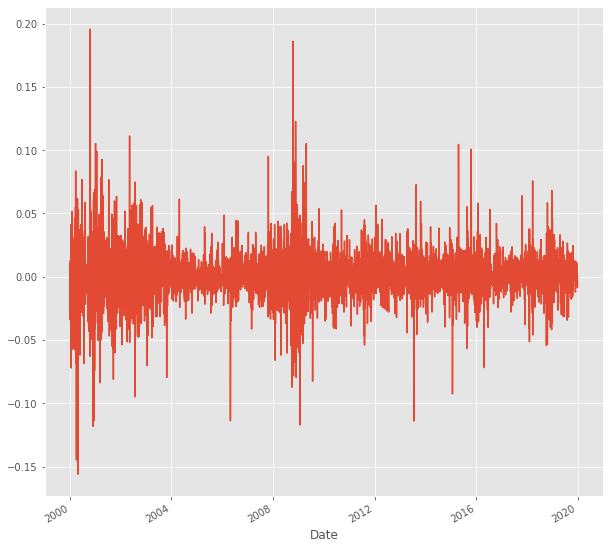

In [ ]:
rets = close_px / close_px.shift(1)  - 1
rets.plot(label = 'return')
plt.show()

Analyze stocks of various IT giants like Microsoft, Apple, Amazon, Google ,IBM

In [ ]:
dfcomp = web.DataReader(['MSFT' , 'AAPL' , 'AMZN' , 'GOOG' , 'IBM'], 'yahoo', start=start, end=end)['Adj Close']
dfcomp.head()

Symbols,MSFT,AAPL,AMZN,GOOG,IBM
Date,,,,,
2000-01-03,37.199776,0.855168,89.3750,NaN,72.603600
2000-01-04,35.943153,0.783068,81.9375,NaN,70.139145
2000-01-05,36.322121,0.794528,69.7500,NaN,72.603600
2000-01-06,35.105415,0.725771,65.5625,NaN,71.351852
2000-01-07,35.564171,0.760149,69.5625,NaN,71.038895


Correlation analysis using correlation function in pandas

In [ ]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,MSFT,AAPL,AMZN,GOOG,IBM
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.033780,-0.084310,-0.083217,NaN,-0.033944
2000-01-05,0.010544,0.014634,-0.148741,NaN,0.035137
2000-01-06,-0.033498,-0.086538,-0.060036,NaN,-0.017241
2000-01-07,0.013068,0.047369,0.061010,NaN,-0.004386
2000-01-10,0.007291,-0.017588,-0.005391,NaN,0.039648
2000-01-11,-0.025612,-0.051151,-0.035230,NaN,0.008475
2000-01-12,-0.032571,-0.059973,-0.047753,NaN,0.004201
2000-01-13,0.018901,0.109677,0.037365,NaN,-0.010460


using heat maps to visualize correlation range of various stocks

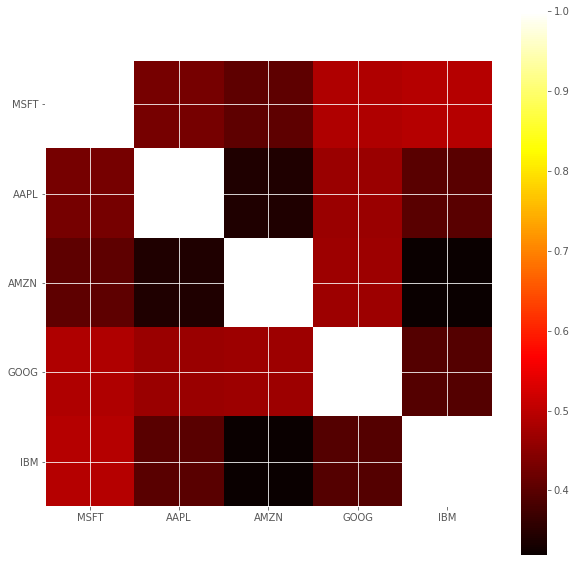

In [ ]:
plt.imshow(corr, cmap = 'hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Stocks Return rate and Risk

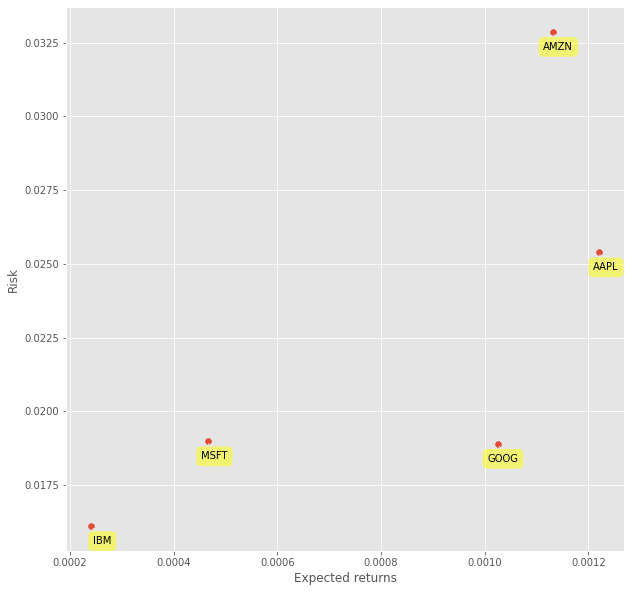

In [ ]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
  plt.annotate(label, xy = (x, y), xytext = (20, -20),
               textcoords = 'offset points', ha = 'right', va = 'bottom',
               bbox = dict(boxstyle = 'round, pad = 0.5', fc  = 'yellow',
                           alpha = 0.5), arrowprops = dict(arrowstyle = '->',
                                                           connectionstyle = 'arc3,rad = 0'))

Importing News-Headlines files for numerical analysis

In [8]:
df1 = pd.read_csv('/content/india-news-headlines.csv')
df1.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [ ]:
df1.tail(10)

,publish_date,headline_category,headline_text
3310823,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...
3310824,20200630,entertainment.hindi.bollywood,sushant singh rajputs demise fans trend cbifor...
3310825,20200630,entertainment.hindi.bollywood,amitabh bachchans grandson agastya nanda prepp...
3310826,20200630,home.education,icse isc result 2020 when where to check class...
3310827,20200630,city.lucknow,up govt imposes weekend restrictions from tonight
3310828,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3310829,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3310830,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3310831,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3310832,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [ ]:
df1.describe()

,publish_date
count,3.310833e+06
mean,2.012476e+07
std,4.887167e+04
min,2.001010e+07
25%,2.009102e+07
50%,2.013072e+07
75%,2.016103e+07
max,2.020063e+07


In [ ]:
df1.max()

publish_date                                                  20200630
headline_category                                          young-turks
headline_text        ~!The 7 Plexus Knots story in a Galaxy called ...
dtype: object

In [ ]:
df1.min()

publish_date                                20010101
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [ ]:
df1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [ ]:
#case of null values
df1.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [ ]:
df1.corr()

,publish_date
publish_date,1.0


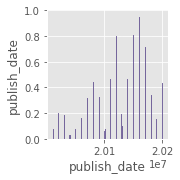

In [ ]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

In [ ]:
df1['headline_text'].value_counts()

Sunny Leone HOT photos                                                98
Watch top news in one-minute                                          90
Official Site                                                         89
Football: Italian Serie A table                                       88
Football: Spanish La Liga table                                       86
                                                                      ..
Back from Japan; man finds wife missing with Rs 30 lakh; neighbour     1
Former headmaster donates Rs 5L to Harvard Tamil Chair                 1
Saffron Party's 1st Candidate List Soon                                1
Compensate farmers hit by notebandi: Congress                          1
Cash-for-votes scam: Amar Singh gives health reasons; skips court      1
Name: headline_text, Length: 3082590, dtype: int64

In [ ]:
df1['headline_category'].value_counts()

india                      286810
unknown                    208266
city.mumbai                133044
city.delhi                 125141
business.india-business    115635
                            ...  
ballot-talk                     7
delhi-ncr                       7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

EDA (Exploratry data analysis) using NLP and NLTK tools

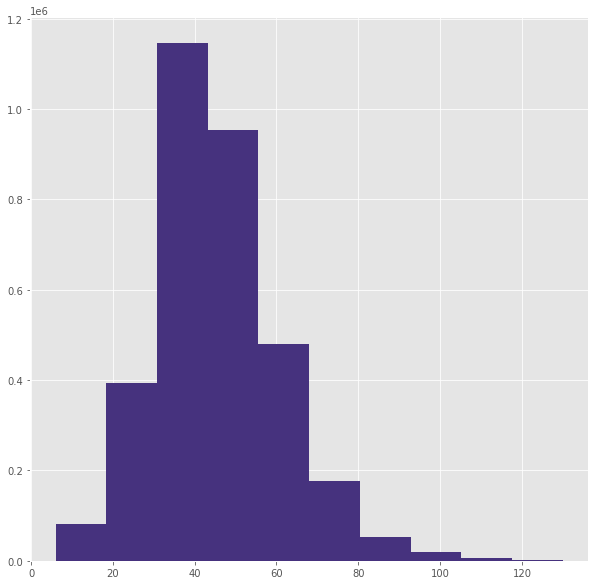

In [ ]:
df1['headline_text'].str.len().hist()
plt.show()

Graph shows that news headlines range from 10 to 120 characters generally.

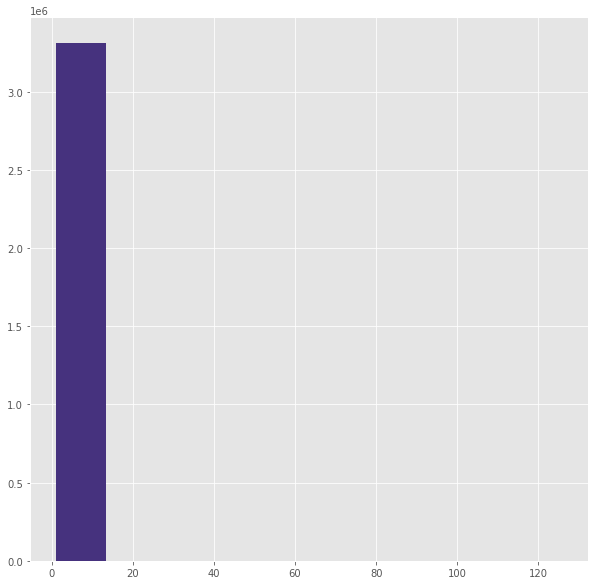

In [ ]:
df1['headline_text'].str.split().\
  apply(lambda x : [len(i) for i in x]). \
  map(lambda x: np.mean(x)).hist()
plt.show()

The average word length ranges from 1 to 15

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
new= df1['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

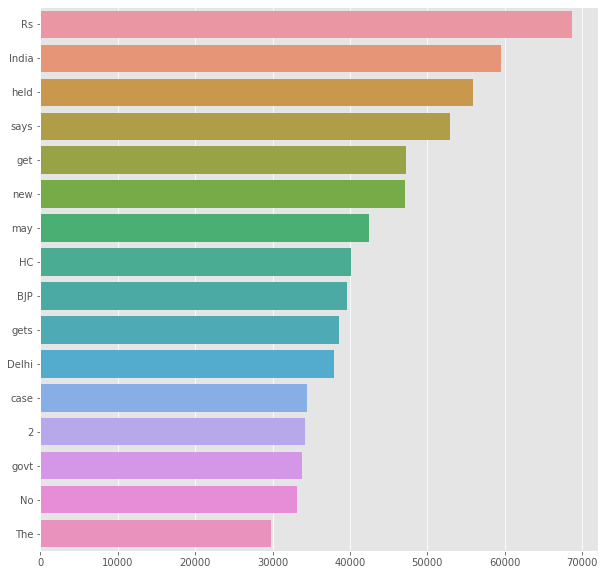

In [ ]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.show()

Ngram exploration

In [ ]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','on','a','world','Tour'],2))

[('I', 'went'), ('went', 'on'), ('on', 'a'), ('a', 'world'), ('world', 'Tour')]

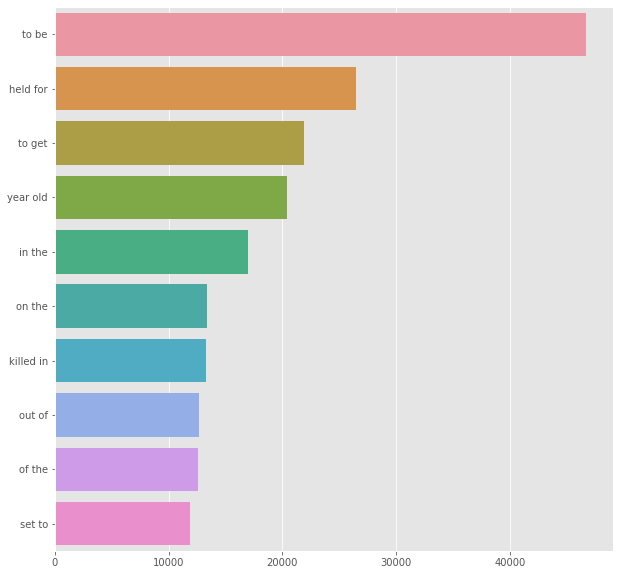

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(df1['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

Using Textblob which is a python library for NLTK

In [6]:
from textblob import TextBlob
TextBlob('100 people killed in road accident').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score']=df1['headline_text'].\
   apply(lambda x : polarity(x))
df1['polarity_score'].hist()
plt.show()

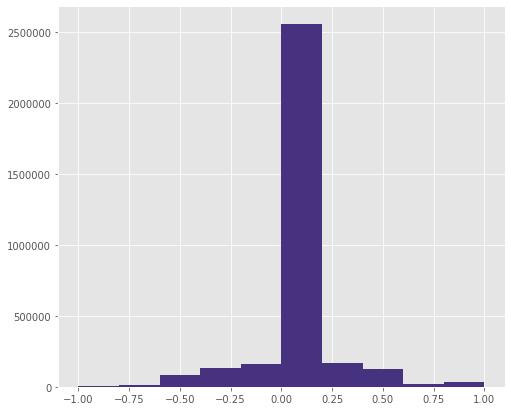

The graph indicates that majority of news headlines are neutral as polarity ranges between mainly 0.00 to 0.20

In [ ]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df1['polarity']=df1['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df1.polarity.value_counts().index,
        df1.polarity.value_counts())
plt.show()

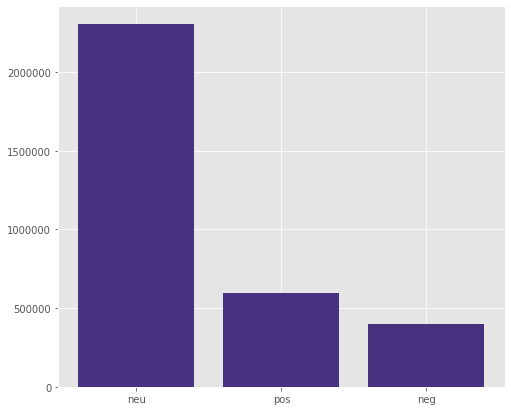

Graph shows that about 70% news is neutral, 20% news is positive and about 10% news is negative.